# Ismael Hasan
## Assignment 8

**IS 362 - Dr. Charles Pak - CUNY School of Professional Studies**

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. <br>

Here is a link to the “Auto MPG” dataset in the UC Irvine data repository:https://archive.ics.uci.edu/ml/datasets/Auto+MPG

> 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
> 2. Review the data and the provided data set description.
> 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
> 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
> 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
> 6. Create a bar chart that shows the distribution for cylinders.
> 7. Create a scatterplot that shows the relationship between horsepower and weight.
> 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

***Read "Auto MPG” dataset in the UC Irvine data repository*** <br>
***Use the attribute information provided in auto-mpg.names to name columns.*** <br>
***Display updated dataset***

In [86]:
auto_data = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                         sep = '\s+',
                         names = ['mpg', 'cylinders', 'displacement','horsepower','weight', 'acceleration', 'model year', 'origin', 'car name'],
                         header = None).set_index('car name')
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.00,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.00,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.00,2295.0,11.6,82,1


***Check Data Types***

In [87]:
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

***Replace ‘?’ in horsepower column with NaN value***

In [88]:
auto_data.replace(to_replace = '?', value = np.NaN)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.00,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.00,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.00,2295.0,11.6,82,1


***Convert horsepower column to numeric type*** <br>
***Check data type***

In [89]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors = 'coerce')
auto_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

***Conver origin column to ‘USA’, ‘Asia’, and ‘Europe’***

In [90]:
auto_data['origin'].replace({1:'USA', 2:'Asia', 3:'Europe'}, inplace = True)
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,USA
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,USA
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,USA
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,USA
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790.0,15.6,82,USA
vw pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Asia
dodge rampage,32.0,4,135.0,84.0,2295.0,11.6,82,USA


***Distribution for cylinders bar chart***

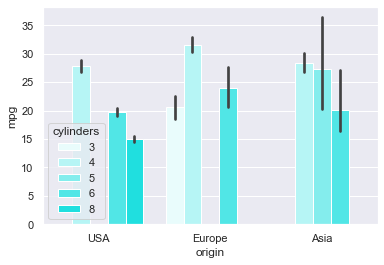

In [91]:
sns.set_style('darkgrid')
sns.barplot(data = auto_data, x = 'origin', y = 'mpg', hue = 'cylinders', color = 'cyan')
sns.set()

***Horsepower and weight relationship per orgin scatterplot***

Text(33.61246831597222, 0.5, 'Weight')

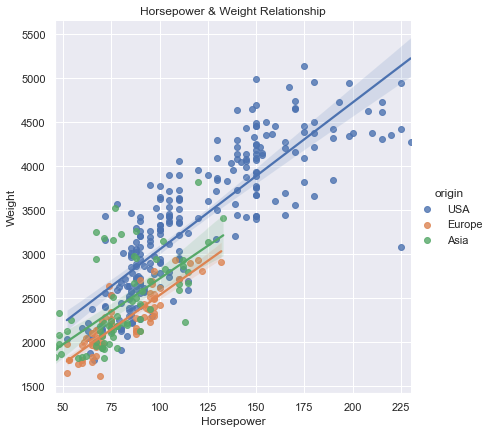

In [92]:
sns.lmplot(data = auto_data, x = 'horsepower', y = 'weight', hue = 'origin', height = 6)
plt.title('Horsepower & Weight Relationship')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

***What is the distribution for acceleration?*** <br>
***matplotlib***

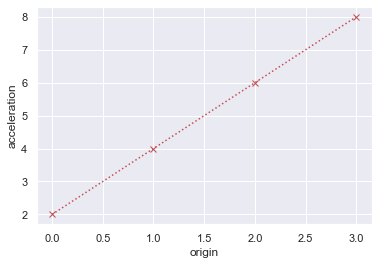

In [93]:
plt.plot([2,4,6,8], linestyle = ':', marker = 'x', color = 'r')
plt.xlabel('origin')
plt.ylabel('acceleration')
plt.show()

***What is the distribution for acceleration?*** <br>
***seaborn***

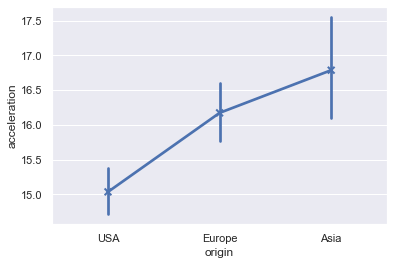

In [94]:
sns.pointplot(x = 'origin', y = 'acceleration', data = auto_data, markers = 'x', color = 'b')